# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from urllib.parse import quote_plus
from pprint import pprint 
import json
from os import path

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
# output_data_file = "output_data/cities.csv"
output_data_file = path.join("output_data", "cities.csv")

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding latitude/longitude (lat_lng) and cities
lat_lngs = []
cities = []


# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

645

In [3]:
# creating an empty list 
city_data = []

In [4]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key + "&q=" + city
print(url)


http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7af1d12a1c4e0e958b9f4a3231142e8e&q=le creusot


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
for city in cities: 
    try:
        r = requests.get('http://api.openweathermap.org/data/2.5/weather', params={'q': city, 'appid': weather_api_key})
        r_data = r.json()
        #Creating variables for the JSON object   
        c_ID = r_data["id"]
        name = r_data["name"]
        lat= r_data["coord"]['lat']
        lon= r_data["coord"]['lon']
        maxtemp = r_data["main"]['temp_max']
        humidity = r_data["main"]["humidity"]
        clouds = r_data["clouds"]['all']
        windSpeed = r_data["wind"]['speed']
        country = r_data["sys"]["country"]
        date = r_data['dt']
        pprint(f'Evaluating city number: {c_ID}, {r_data["name"]}')
#creating a list of dictionaries to build the dataframe         
        city_data.append({
                "City" : name,
                "Lat" : lat,    
                "Lng" : lon,
                "Max Temp" : maxtemp,
                "Humidity" : humidity,
                "Cloudiness" : clouds,
                "Wind Speed" : windSpeed,
                "Country" : country,      
                "CityDate" : date
       })
        pprint(f'Appending {name} to "city_data"')
    except KeyError:
        pass


'Evaluating city number: 1214488, Meulaboh'
'Appending Meulaboh to "city_data"'
'Evaluating city number: 878549, Zvishavane'
'Appending Zvishavane to "city_data"'
'Evaluating city number: 64814, Bandarbeyla'
'Appending Bandarbeyla to "city_data"'
'Evaluating city number: 3874787, Punta Arenas'
'Appending Punta Arenas to "city_data"'
'Evaluating city number: 2381334, Atar'
'Appending Atar to "city_data"'
'Evaluating city number: 2163355, Hobart'
'Appending Hobart to "city_data"'
'Evaluating city number: 3407762, Amapá'
'Appending Amapá to "city_data"'
'Evaluating city number: 1510689, Baykit'
'Appending Baykit to "city_data"'
'Evaluating city number: 2630299, Hofn'
'Appending Hofn to "city_data"'
'Evaluating city number: 1507390, Dikson'
'Appending Dikson to "city_data"'
'Evaluating city number: 5106841, Albany'
'Appending Albany to "city_data"'
'Evaluating city number: 2110227, Butaritari'
'Appending Butaritari to "city_data"'
'Evaluating city number: 5924351, Clyde River'
'Appending C

'Evaluating city number: 5282297, Bethel'
'Appending Bethel to "city_data"'
'Evaluating city number: 2236967, Soyo'
'Appending Soyo to "city_data"'
'Evaluating city number: 129512, Kalāleh'
'Appending Kalāleh to "city_data"'
'Evaluating city number: 2022572, Khatanga'
'Appending Khatanga to "city_data"'
'Evaluating city number: 964420, Port Elizabeth'
'Appending Port Elizabeth to "city_data"'
'Evaluating city number: 2177069, Ballina'
'Appending Ballina to "city_data"'
'Evaluating city number: 4760059, Fredericksburg'
'Appending Fredericksburg to "city_data"'
'Evaluating city number: 4034188, Moerai'
'Appending Moerai to "city_data"'
'Evaluating city number: 610091, Chingirlau'
'Appending Chingirlau to "city_data"'
'Evaluating city number: 5870133, Nome'
'Appending Nome to "city_data"'
'Evaluating city number: 1489853, Tazovsky'
'Appending Tazovsky to "city_data"'
'Evaluating city number: 1056899, Sambava'
'Appending Sambava to "city_data"'
'Evaluating city number: 107304, Buraidah'
'A

'Evaluating city number: 3448903, São João da Barra'
'Appending São João da Barra to "city_data"'
'Evaluating city number: 1786855, Yatou'
'Appending Yatou to "city_data"'
'Evaluating city number: 3945985, Camaná'
'Appending Camaná to "city_data"'
'Evaluating city number: 2122293, Ozernovskiy'
'Appending Ozernovskiy to "city_data"'
'Evaluating city number: 3398428, Humberto de Campos'
'Appending Humberto de Campos to "city_data"'
'Evaluating city number: 886763, Masvingo'
'Appending Masvingo to "city_data"'
'Evaluating city number: 1173302, Kot Diji'
'Appending Kot Diji to "city_data"'
'Evaluating city number: 3694112, Paita'
'Appending Paita to "city_data"'
'Evaluating city number: 6113406, Prince Rupert'
'Appending Prince Rupert to "city_data"'
'Evaluating city number: 4031742, Egvekinot'
'Appending Egvekinot to "city_data"'
'Evaluating city number: 3354077, Opuwo'
'Appending Opuwo to "city_data"'
'Evaluating city number: 3580279, Gouyave'
'Appending Gouyave to "city_data"'
'Evaluati

'Evaluating city number: 1809858, Guangzhou'
'Appending Guangzhou to "city_data"'
'Evaluating city number: 582447, Almaznyy'
'Appending Almaznyy to "city_data"'
'Evaluating city number: 2396518, Port-Gentil'
'Appending Port-Gentil to "city_data"'
'Evaluating city number: 565857, Dobrinka'
'Appending Dobrinka to "city_data"'
'Evaluating city number: 3465487, Coromandel'
'Appending Coromandel to "city_data"'
'Evaluating city number: 520318, Nizhnyaya Maktama'
'Appending Nizhnyaya Maktama to "city_data"'
'Evaluating city number: 160552, Chato'
'Appending Chato to "city_data"'
'Evaluating city number: 1266668, Khonsa'
'Appending Khonsa to "city_data"'
'Evaluating city number: 1735089, Parit Buntar'
'Appending Parit Buntar to "city_data"'
'Evaluating city number: 1337610, Thinadhoo'
'Appending Thinadhoo to "city_data"'
'Evaluating city number: 3573374, The Valley'
'Appending The Valley to "city_data"'
'Evaluating city number: 3424901, Aasiaat'
'Appending Aasiaat to "city_data"'
'Evaluating 

'Evaluating city number: 2022773, Khandyga'
'Appending Khandyga to "city_data"'
'Evaluating city number: 1278017, Bādāmi'
'Appending Bādāmi to "city_data"'
'Evaluating city number: 3839307, Rawson'
'Appending Rawson to "city_data"'
'Evaluating city number: 1058381, Morondava'
'Appending Morondava to "city_data"'
'Evaluating city number: 6078372, Moose Factory'
'Appending Moose Factory to "city_data"'
'Evaluating city number: 1502422, Kosh-Agach'
'Appending Kosh-Agach to "city_data"'
'Evaluating city number: 311071, Isparta Province'
'Appending Isparta Province to "city_data"'
'Evaluating city number: 3394372, Morros'
'Appending Morros to "city_data"'
'Evaluating city number: 4828890, Chillicothe'
'Appending Chillicothe to "city_data"'
'Evaluating city number: 553766, Kamenka'
'Appending Kamenka to "city_data"'
'Evaluating city number: 4031637, Lavrentiya'
'Appending Lavrentiya to "city_data"'
'Evaluating city number: 1606239, Si Sa Ket'
'Appending Si Sa Ket to "city_data"'
'Evaluating 

'Evaluating city number: 5503766, Enterprise'
'Appending Enterprise to "city_data"'
'Evaluating city number: 1498161, Muzhi'
'Appending Muzhi to "city_data"'
'Evaluating city number: 366444, Tambura'
'Appending Tambura to "city_data"'
'Evaluating city number: 5866063, Kenai'
'Appending Kenai to "city_data"'
'Evaluating city number: 624079, Orsha'
'Appending Orsha to "city_data"'
'Evaluating city number: 2077895, Alice Springs'
'Appending Alice Springs to "city_data"'
'Evaluating city number: 3468802, Buri'
'Appending Buri to "city_data"'
'Evaluating city number: 2120048, Ust-Nera'
'Appending Ust-Nera to "city_data"'
'Evaluating city number: 1185274, Baniachang'
'Appending Baniachang to "city_data"'
'Evaluating city number: 2562619, Saint Lawrence'
'Appending Saint Lawrence to "city_data"'
'Evaluating city number: 5594956, Hailey'
'Appending Hailey to "city_data"'
'Evaluating city number: 2068110, Kununurra'
'Appending Kununurra to "city_data"'
'Evaluating city number: 3010025, La Ciota

In [6]:
pprint(r_data)

{'base': 'stations',
 'clouds': {'all': 90},
 'cod': 200,
 'coord': {'lat': 46.81, 'lon': 4.42},
 'dt': 1594864680,
 'id': 3004427,
 'main': {'feels_like': 288.56,
          'humidity': 72,
          'pressure': 1020,
          'temp': 288.99,
          'temp_max': 289.15,
          'temp_min': 288.71},
 'name': 'Le Creusot',
 'sys': {'country': 'FR',
         'id': 6499,
         'sunrise': 1594872260,
         'sunset': 1594927924,
         'type': 1},
 'timezone': 7200,
 'visibility': 10000,
 'weather': [{'description': 'overcast clouds',
              'icon': '04n',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 0, 'speed': 1}}


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
# use iloc or loc to select humidity column and then specify conditions (>100) 
#create a dataframe from city_data 
df = pd.DataFrame(city_data)
# seeing if we removed any data from the dataframe
len(df)
df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,CityDate
count,596.000000,596.000000,596.000000,596.000000,596.000000,596.000000,5.960000e+02
mean,19.272315,14.291275,293.530688,71.424497,48.931208,3.434211,1.594865e+09
std,32.658711,90.456248,7.841712,20.199160,39.565926,2.267922,8.814475e+01
min,-54.800000,-179.170000,270.150000,1.000000,0.000000,0.090000,1.594864e+09
25%,-6.885000,-65.152500,287.665000,63.000000,2.000000,1.597500,1.594865e+09
50%,22.185000,18.395000,294.980000,76.000000,45.500000,3.060000,1.594865e+09
75%,47.587500,93.917500,299.452500,86.000000,90.000000,4.652500,1.594865e+09
max,78.220000,179.320000,315.370000,100.000000,100.000000,13.120000,1.594865e+09


In [8]:
df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,CityDate
0,Meulaboh,4.14,96.13,300.29,85,73,1.15,ID,1594864638
1,Zvishavane,-20.33,30.07,281.73,81,97,5.19,ZW,1594864638
2,Bandarbeyla,9.49,50.81,300.91,60,10,11.92,SO,1594864638
3,Punta Arenas,-53.15,-70.92,273.15,94,6,2.10,CL,1594864638
4,Atar,20.52,-13.05,304.88,22,0,3.45,MR,1594864638


In [9]:
#creating dataframe without cities with humidity over 100%
df_HumUnder100 = df.loc[df["Humidity"] <= 100]
# checking length of new dataframe
f'There are {len(df_HumUnder100)} cities with humidity 100% or less'

'There are 596 cities with humidity 100% or less'

In [10]:
#  Get the indices of cities that have humidity =< 100%.
df_HumOvr100 = df.loc[df["Humidity"] > 100]
f'There are {len(df_HumOvr100)} cities greater then 100% humidity'

'There are 0 cities greater then 100% humidity'

In [11]:
df_HumUnder100.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,CityDate
0,Meulaboh,4.14,96.13,300.29,85,73,1.15,ID,1594864638
1,Zvishavane,-20.33,30.07,281.73,81,97,5.19,ZW,1594864638
2,Bandarbeyla,9.49,50.81,300.91,60,10,11.92,SO,1594864638
3,Punta Arenas,-53.15,-70.92,273.15,94,6,2.10,CL,1594864638
4,Atar,20.52,-13.05,304.88,22,0,3.45,MR,1594864638


In [12]:
#cleaning df of any invalid data
new_df = df.drop(df_HumOvr100.index)
new_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,CityDate
0,Meulaboh,4.14,96.13,300.29,85,73,1.15,ID,1594864638
1,Zvishavane,-20.33,30.07,281.73,81,97,5.19,ZW,1594864638
2,Bandarbeyla,9.49,50.81,300.91,60,10,11.92,SO,1594864638
3,Punta Arenas,-53.15,-70.92,273.15,94,6,2.10,CL,1594864638
4,Atar,20.52,-13.05,304.88,22,0,3.45,MR,1594864638


In [13]:
# converting max temp from Kelvin to Celcius

new_df["Temp (C)"] = new_df["Max Temp"] - 273.15
new_df.drop(["Max Temp"], axis = 1)

,City,Lat,Lng,Humidity,Cloudiness,Wind Speed,Country,CityDate,Temp (C)
0,Meulaboh,4.14,96.13,85,73,1.15,ID,1594864638,27.14
1,Zvishavane,-20.33,30.07,81,97,5.19,ZW,1594864638,8.58
2,Bandarbeyla,9.49,50.81,60,10,11.92,SO,1594864638,27.76
3,Punta Arenas,-53.15,-70.92,94,6,2.10,CL,1594864638,0.00
4,Atar,20.52,-13.05,22,0,3.45,MR,1594864638,31.73
...,...,...,...,...,...,...,...,...,...
591,Klyuchi,52.27,79.17,57,0,5.99,RU,1594864679,18.88
592,Havelock,34.88,-76.90,80,1,2.60,US,1594864679,28.00
593,Key Largo,25.09,-80.45,82,99,0.45,US,1594864680,28.89
594,Huarmey,-10.07,-78.15,85,68,4.20,PE,1594864680,16.31


### Exporting the dataframe to CSV 

In [14]:
# df.to_csv('file_name.csv')
new_df.to_csv(output_data_file, index_label="City_ID")

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [15]:
# Setting the figure size
fig = plt.figure(figsize=(10,5))

# #Saving the plot as an image
fig.savefig('line plot.jpg', bbox_inches='tight', dpi=250)

<Figure size 720x360 with 0 Axes>

## Latitude vs. Temperature Plot

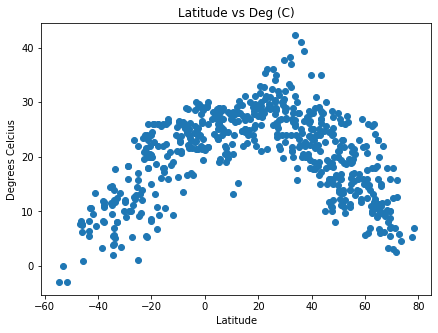

In [16]:
x = new_df["Lat"]
y = new_df["Temp (C)"]
fig = plt.figure(figsize=(7,5))
plt.scatter(x, y)
plt.xlabel("Latitude")
plt.ylabel("Degrees Celcius")
plt.title("Latitude vs Deg (C)")
fig.savefig("Scatterplot_1.png", bbox_inches='tight', dpi=250)
plt.show()

## Latitude vs. Humidity Plot

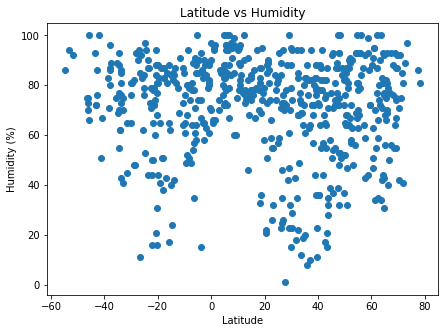

In [17]:
x = new_df["Lat"]
y = new_df["Humidity"]
fig = plt.figure(figsize=(7,5))
plt.scatter(x, y)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Latitude vs Humidity")
fig.savefig("Scatterplot_2.png", bbox_inches='tight', dpi=250)
plt.show()

## Latitude vs. Cloudiness Plot

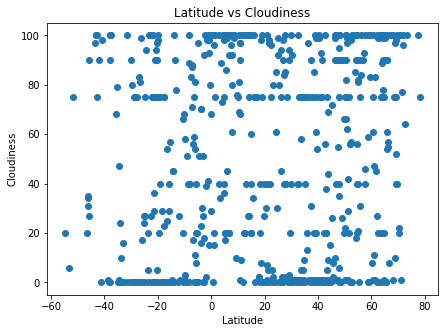

In [18]:
x = new_df["Lat"]
y = new_df["Cloudiness"]
fig = plt.figure(figsize=(7,5))
plt.scatter(x, y)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Latitude vs Cloudiness")
fig.savefig("Scatterplot_3.png", bbox_inches='tight', dpi=250)
plt.show()

## Latitude vs. Wind Speed Plot

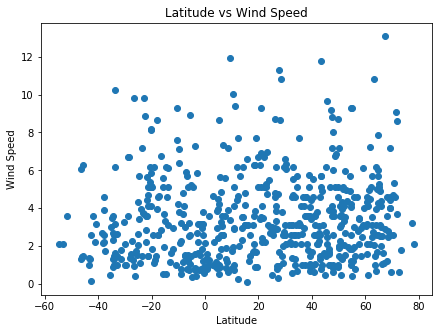

In [19]:
x = new_df["Lat"]
y = new_df["Wind Speed"]
fig = plt.figure(figsize=(7,5))
plt.scatter(x, y)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Latitude vs Wind Speed")
fig.savefig("Scatterplot_4.png", bbox_inches='tight', dpi=250)
plt.show()

## Linear Regression

In [20]:
# OPTIONAL: Create a function to create Linear Regression plots
# Add the linear regression equation and line to plot

In [21]:
# Create Northern and Southern Hemisphere DataFrames
df_NorthHem = new_df.loc[new_df["Lat"] > 0]
df_SouthHem = new_df.loc[new_df["Lat"] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared value is: 0.44703182934669283


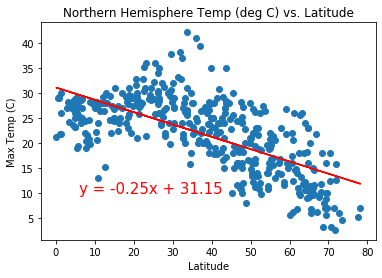

In [22]:
x_Lat = df_NorthHem['Lat']
y_Temp = df_NorthHem['Temp (C)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_Lat, y_Temp)
regress_values = x_Lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_Lat,y_Temp)
plt.plot(x_Lat, regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp (C)')
plt.title("Northern Hemisphere Temp (deg C) vs. Latitude")
print(f"The r-squared value is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared value is: 0.6296474517151058


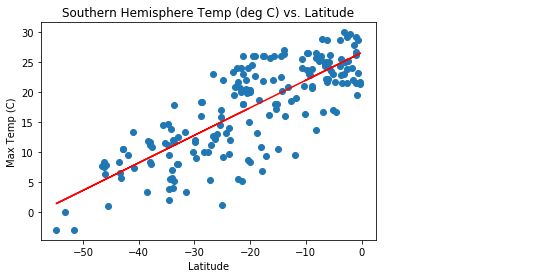

In [23]:
x_Lat = df_SouthHem['Lat']
y_Temp = df_SouthHem['Temp (C)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_Lat, y_Temp)
regress_values = x_Lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_Lat,y_Temp)
plt.plot(x_Lat, regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp (C)')
plt.title("Southern Hemisphere Temp (deg C) vs. Latitude")
print(f"The r-squared value is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared value is: 0.009426284514457225


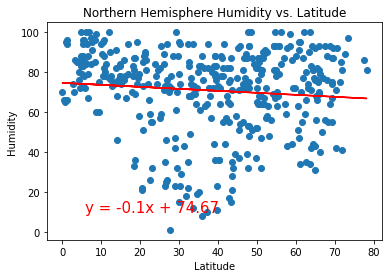

In [24]:
x_Lat = df_NorthHem['Lat']
y_Hum = df_NorthHem['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_Lat, y_Hum)
regress_values = x_Lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_Lat, y_Hum)
plt.plot(x_Lat, regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title("Northern Hemisphere Humidity vs. Latitude")
print(f"The r-squared value is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared value is: 0.003804165209063008


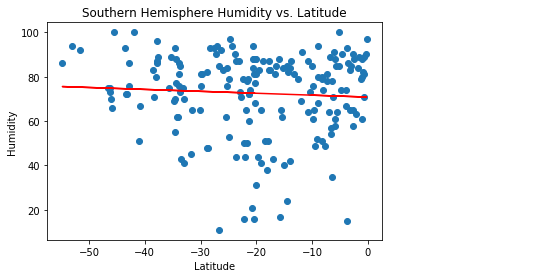

In [25]:
x_Lat = df_SouthHem['Lat']
y_Hum = df_SouthHem['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_Lat, y_Hum)
regress_values = x_Lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_Lat,y_Hum)
plt.plot(x_Lat, regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title("Southern Hemisphere Humidity vs. Latitude")
print(f"The r-squared value is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared value is: 0.0008953511479493278


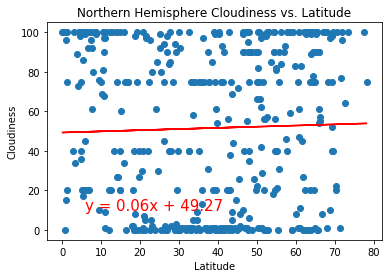

In [26]:
x_Lat = df_NorthHem['Lat']
y_Cld = df_NorthHem['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_Lat, y_Cld)
regress_values = x_Lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_Lat,y_Cld)
plt.plot(x_Lat, regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title("Northern Hemisphere Cloudiness vs. Latitude")
print(f"The r-squared value is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared value is: 0.001670429254113281


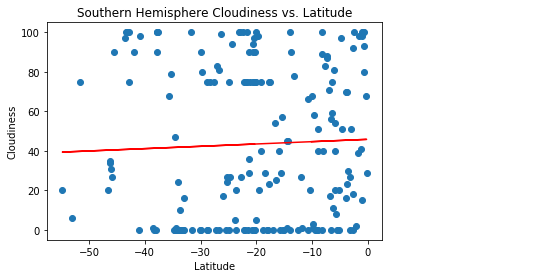

In [27]:
x_Lat = df_SouthHem['Lat']
y_Cld = df_SouthHem['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_Lat, y_Cld)
regress_values = x_Lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_Lat,y_Cld)
plt.plot(x_Lat, regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title("Southern Hemisphere Cloudiness vs. Latitude")
print(f"The r-squared value is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared value is: 0.0038992914869515898


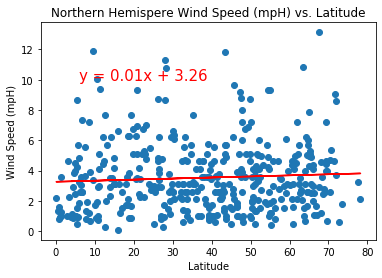

In [28]:
x_Lat = df_NorthHem['Lat']
y_Wnd = df_NorthHem['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_Lat, y_Wnd)
regress_values = x_Lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_Lat,y_Wnd)
plt.plot(x_Lat, regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mpH)')
plt.title("Northern Hemispere Wind Speed (mpH) vs. Latitude")
print(f"The r-squared value is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared value is: 0.0005421303545355182


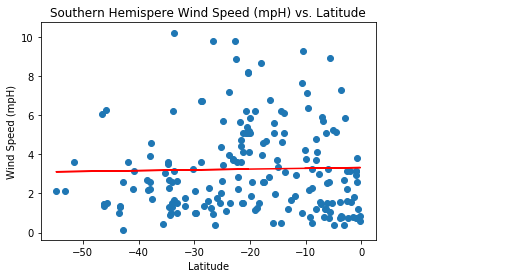

In [29]:
x_Lat = df_SouthHem['Lat']
y_Wnd = df_SouthHem['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_Lat, y_Wnd)
regress_values = x_Lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_Lat,y_Wnd)
plt.plot(x_Lat, regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mpH)')
plt.title("Southern Hemispere Wind Speed (mpH) vs. Latitude")
print(f"The r-squared value is: {rvalue**2}")
plt.show()